In [3]:
pip install chardet pandas -i https://mirrors.aliyun.com/pypi/simple/

Looking in indexes: https://mirrors.aliyun.com/pypi/simple/
Note: you may need to restart the kernel to use updated packages.


In [8]:
import chardet 
import pandas as pd
# 读取CSV文件
csv_file = '/root/Download/Modis-algae-aliyun/aie-taihu/lanshanzui.csv'  # 替换为你的CSV文件路径

# 检测文件编码
with open(csv_file, 'rb') as f:
    result = chardet.detect(f.read())  # 读取文件内容，探测编码

print(result['encoding'])
# 使用探测到的编码读取文件
df = pd.read_csv(csv_file, encoding=result['encoding'])

ascii


In [9]:
print(df.columns)

Index(['date', 'temperature', 'pH', 'oxygen', 'permanganate', 'NH', 'TP', 'TN',
       'conductivity', 'turbidity', 'chla', 'density'],
      dtype='object')


每日密度数据的统计分析结果（包括95%置信区间）：
                    mean           std  count      lower_ci      upper_ci
date                                                                     
2021-01-01  8.759783e+06  1.700044e+06      6  7.399465e+06  1.012010e+07
2021-01-02  7.334620e+06  2.235216e+06      6  5.546075e+06  9.123165e+06
2021-01-03  5.136342e+06  1.808357e+06      6  3.689355e+06  6.583329e+06
2021-01-04  3.622895e+06  8.552432e+05      6  2.938558e+06  4.307232e+06
2021-01-05  3.845083e+06  1.111318e+06      6  2.955844e+06  4.734323e+06
...                  ...           ...    ...           ...           ...
2024-05-27  1.355000e+07  7.943551e+05      6  1.291438e+07  1.418562e+07
2024-05-28  1.240327e+07  3.380136e+06      6  9.698594e+06  1.510794e+07
2024-05-29  7.934925e+06  2.789095e+05      6  7.711751e+06  8.158099e+06
2024-05-30  8.036935e+06  3.566925e+05      6  7.751521e+06  8.322348e+06
2024-05-31  7.424874e+06  2.599939e+05      6  7.216836e+06  7.632913e+06

[1247 rows 

/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 23494 (\N{CJK UNIFIED IDEOGRAPH-5BC6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: Us

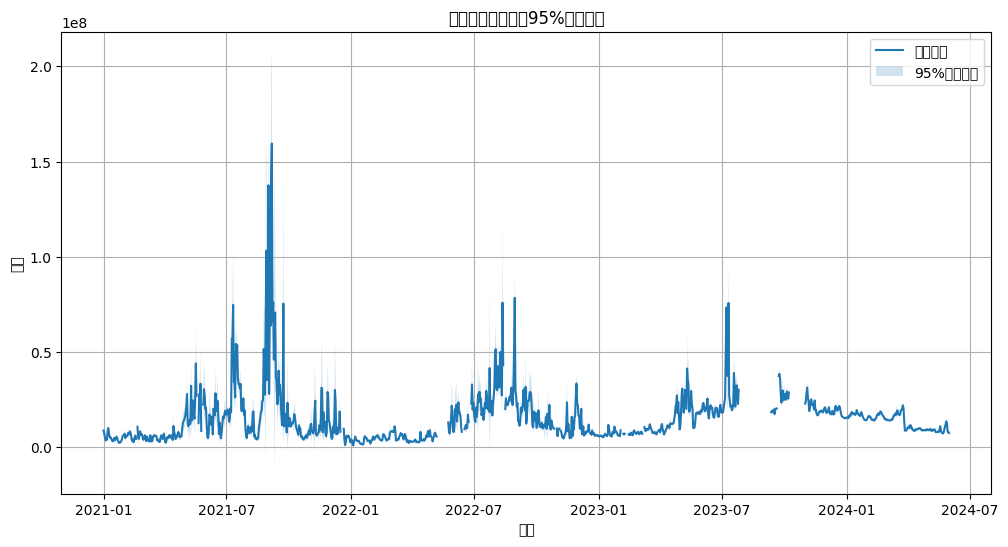

In [10]:
import numpy as np
# 将日期列转换为日期时间格式
df['date'] = pd.to_datetime(df['date'])

# 设置日期为索引
df.set_index('date', inplace=True)

# 按日期分组并计算每日的统计数据
daily_stats = df['density'].resample('D').agg(['mean', 'std', 'count'])

# 计算95%置信区间
confidence_interval = 1.96 * daily_stats['std'] / np.sqrt(daily_stats['count'])

# 计算置信区间的上下限
daily_stats['lower_ci'] = daily_stats['mean'] - confidence_interval
daily_stats['upper_ci'] = daily_stats['mean'] + confidence_interval

# 打印结果
print("每日密度数据的统计分析结果（包括95%置信区间）：")
print(daily_stats)

# 可视化结果
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(daily_stats.index, daily_stats['mean'], label='平均密度')
plt.fill_between(daily_stats.index, daily_stats['lower_ci'], daily_stats['upper_ci'], alpha=0.2, label='95%置信区间')
plt.xlabel('日期')
plt.ylabel('密度')
plt.title('每日密度数据及其95%置信区间')
plt.legend()
plt.grid(True)
plt.show()
